<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.134782,214.621521,214.477932,0.143589
1,0.0,1.0,88.215495,94.604408,36.752253,0.042328,229.614484,229.552057,0.062427
2,0.0,2.0,75.723322,35.232029,46.417423,-0.207032,167.165742,167.387419,-0.221678
3,0.0,3.0,38.055184,66.641168,96.212257,-0.481988,210.426621,210.913184,-0.486563
4,0.0,4.0,68.821230,68.543753,46.272811,-0.276782,193.361013,193.639067,-0.278053
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-0.327613,178.429826,178.789562,-0.359736
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.182911,160.574077,160.715051,-0.140974
249997,999.0,247.0,73.636953,77.707721,80.827540,0.199599,242.371812,242.138647,0.233166
249998,999.0,248.0,96.730468,97.527144,33.411083,0.241300,237.909995,237.685205,0.224790


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.134782,214.621521,214.477932,0.143589
1,0.0,1.0,88.215495,94.604408,36.752253,0.042328,229.614484,229.552057,0.062427
2,0.0,2.0,75.723322,35.232029,46.417423,-0.207032,167.165742,167.387419,-0.221678
3,0.0,3.0,38.055184,66.641168,96.212257,-0.481988,210.426621,210.913184,-0.486563
4,0.0,4.0,68.821230,68.543753,46.272811,-0.276782,193.361013,193.639067,-0.278053
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-0.327613,178.429826,178.789562,-0.359736
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.182911,160.574077,160.715051,-0.140974
249997,999.0,247.0,73.636953,77.707721,80.827540,0.199599,242.371812,242.138647,0.233166
249998,999.0,248.0,96.730468,97.527144,33.411083,0.241300,237.909995,237.685205,0.224790


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    57.585513  99.226585  47.674641  ...  214.621521  214.477932  0.143589
      1.0    88.215495  94.604408  36.752253  ...  229.614484  229.552057  0.062427
      2.0    75.723322  35.232029  46.417423  ...  167.165742  167.387419 -0.221678
      3.0    38.055184  66.641168  96.212257  ...  210.426621  210.913184 -0.486563
      4.0    68.821230  68.543753  46.272811  ...  193.361013  193.639067 -0.278053
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  82.142416  53.368686  33.246337  ...  178.429826  178.789562 -0.359736
      246.0  32.379447  24.201317  94.176224  ...  160.574077  160.715051 -0.140974
      247.0  73.636953  77.707721  80.827540  ...  242.371812  242.138647  0.233166
      248.0  96.730468  97.527144  33.411083  ...  237.909995  237.685205  0.224790
      249.0  92.431783  65.077315  73.380665  ...  240.962273  240.881448  0.080825

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    57.585513  99.226585  47.674641  ...  214.621521  214.477932  0.143589
      1.0    88.215495  94.604408  36.752253  ...  229.614484  229.552057  0.062427
      2.0    75.723322  35.232029  46.417423  ...  167.165742  167.387419 -0.221678
      3.0    38.055184  66.641168  96.212257  ...  210.426621  210.913184 -0.486563
      4.0    68.821230  68.543753  46.272811  ...  193.361013  193.639067 -0.278053
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  82.142416  53.368686  33.246337  ...  178.429826  178.789562 -0.359736
      246.0  32.379447  24.201317  94.176224  ...  160.574077  160.715051 -0.140974
      247.0  73.636953  77.707721  80.827540  ...  242.371812  242.138647  0.233166
      248.0  96.730468  97.527144  33.411083  ...  237.909995  237.685205  0.224790
      249.0  92.431783  65.077315  73.380665  ...  240.962273  240.881448  0.080825

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.134782,214.621521,214.477932,0.143589
1,0.0,1.0,88.215495,94.604408,36.752253,0.042328,229.614484,229.552057,0.062427
2,0.0,2.0,75.723322,35.232029,46.417423,-0.207032,167.165742,167.387419,-0.221678
3,0.0,3.0,38.055184,66.641168,96.212257,-0.481988,210.426621,210.913184,-0.486563
4,0.0,4.0,68.821230,68.543753,46.272811,-0.276782,193.361013,193.639067,-0.278053
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-0.327613,178.429826,178.789562,-0.359736
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.182911,160.574077,160.715051,-0.140974
249997,999.0,247.0,73.636953,77.707721,80.827540,0.199599,242.371812,242.138647,0.233166
249998,999.0,248.0,96.730468,97.527144,33.411083,0.241300,237.909995,237.685205,0.224790


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    57.585513  99.226585  47.674641  ...  214.621521  214.477932  0.143589
      1.0    88.215495  94.604408  36.752253  ...  229.614484  229.552057  0.062427
      2.0    75.723322  35.232029  46.417423  ...  167.165742  167.387419 -0.221678
      3.0    38.055184  66.641168  96.212257  ...  210.426621  210.913184 -0.486563
      4.0    68.821230  68.543753  46.272811  ...  193.361013  193.639067 -0.278053
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  82.142416  53.368686  33.246337  ...  178.429826  178.789562 -0.359736
      246.0  32.379447  24.201317  94.176224  ...  160.574077  160.715051 -0.140974
      247.0  73.636953  77.707721  80.827540  ...  242.371812  242.138647  0.233166
      248.0  96.730468  97.527144  33.411083  ...  237.909995  237.685205  0.224790
      249.0  92.431783  65.077315  73.380665  ...  240.962273  240.881448  0.080825

[250000 rows x 7 columns]

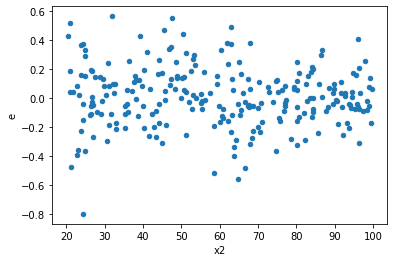

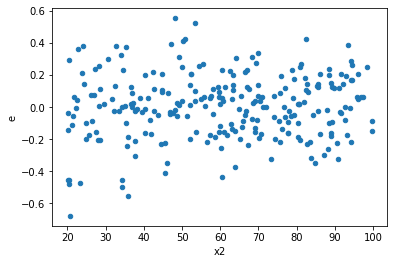

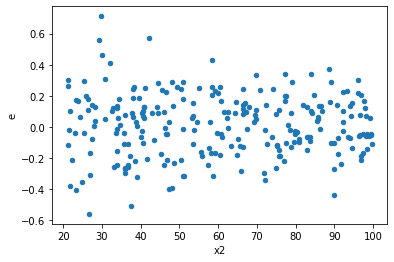

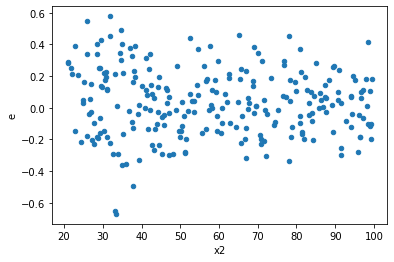

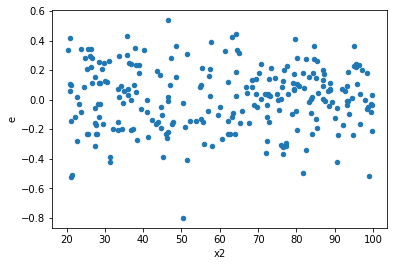

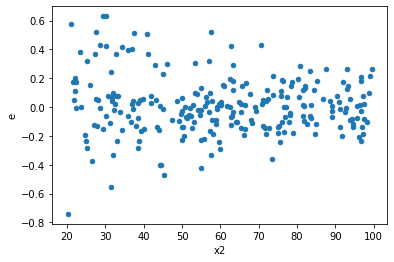

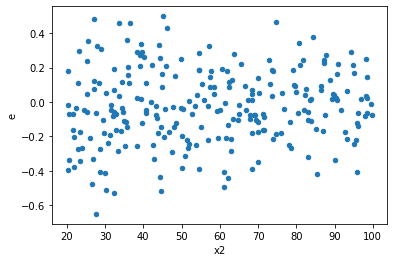

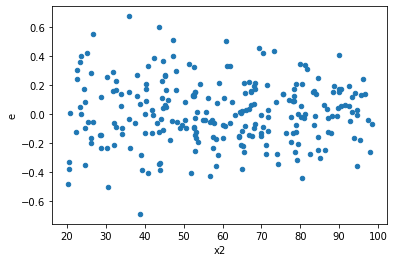

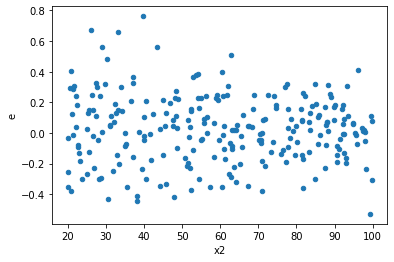

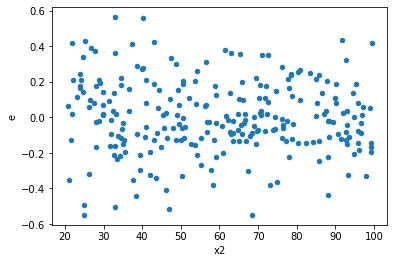

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,5.2319823585234015,2.348610825297371,0.05393796245900414,0.024212482735024445,0.4488950199671944,0.00010295719811561577,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,5.2831492089240175,2.9941821710757983,0.05446545576210327,0.030867857433771118,0.5667419284729236,0.005592074794293022,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,5.441845858379913,2.580771352146825,0.056101503694638274,0.02660589022831778,0.47424558124385097,0.00029096361952460977,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,5.840482265494907,3.0368258654981357,0.060211157376236155,0.03130748314946532,0.519961490755559,0.0014505107158161424,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,5.40776834443788,3.4110888997981403,0.055750189117916286,0.03516586494637258,0.6307757068230541,0.02422819562868165,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,6.018615111087393,2.0113177452130886,0.06204757846481849,0.02073523448673287,0.33418281582882287,1.4594307171587722e-07,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,5.791486166866217,3.1046499768492555,0.05970604295738368,0.03200670079226037,0.5360713791584841,0.002379891942869233,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,6.077171478416092,3.4735837546133985,0.06265125235480508,0.035810141800138126,0.5715790260239171,0.006336360695674286,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,6.307232288966179,2.7607065510191737,0.06502301328831113,0.028460892278548183,0.43770491152652347,6.262650204850248e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    822
Reject001=1 : Homoscedasticity      178
Name: Result_test, dtype: int64